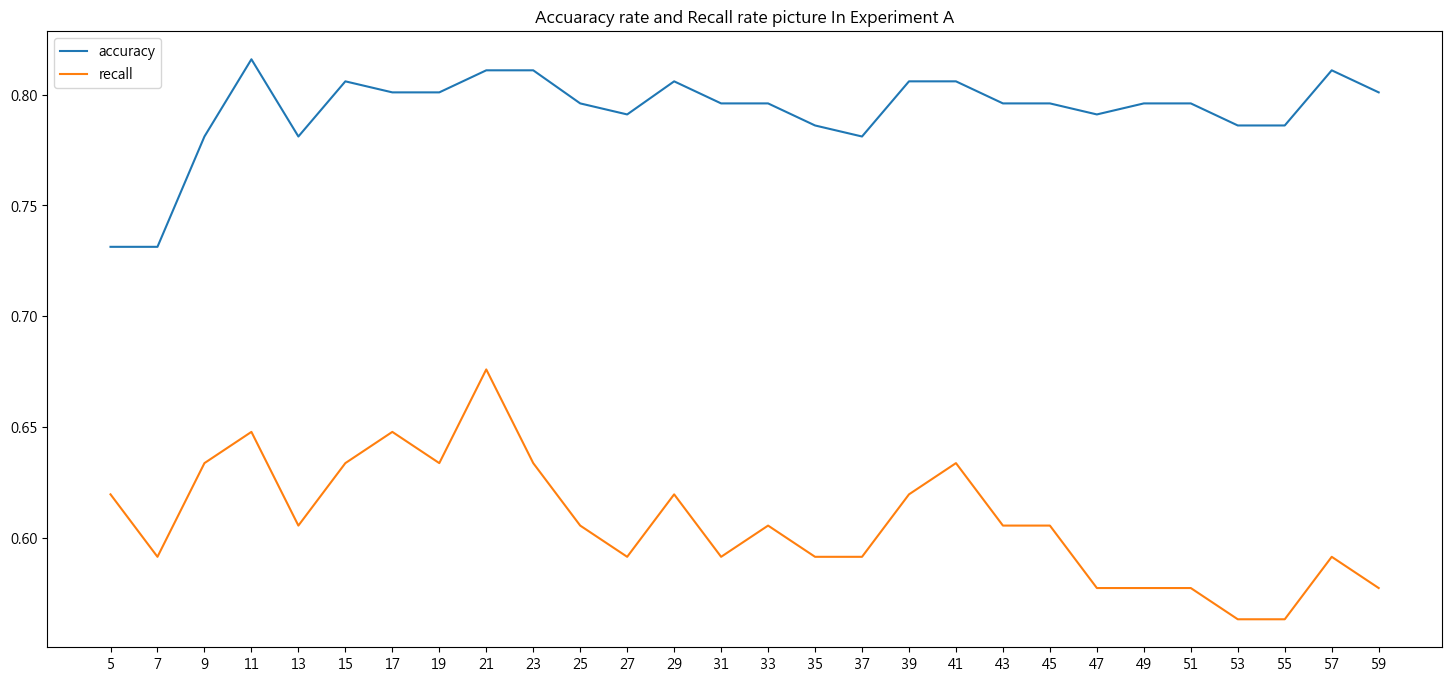

Accuracy rate(for k = 5) is : 0.7313432835820896
Recall rate(for k = 5) is : 0.6197183098591549


In [2]:
#實驗A
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

fp = pd.read_csv("train_data.csv")
fn = pd.read_csv("test_data.csv")

#training data and test data標準化
#把一些不合理的資料換成平均(有扣掉不合理的資料)
list_P = [] #Pregnancies
test_P = []
Max =fp["Pregnancies"].max()
Min =fp["Pregnancies"].min()
for i in fp["Pregnancies"]:
    list_P.append((i-Min)/Max)
for i in fn["Pregnancies"]:
    test_P.append((i-Min)/Max)
    
list_G = [] #Glucose
test_G = [] 
Max =fp["Glucose"].max()
Min =fp["Glucose"][fp["Glucose"]>0].min()
mean =fp["Glucose"][fp["Glucose"]>0].mean()
for i in fp["Glucose"]:
    if i <= 0:
        list_G.append((mean-Min)/Max)
    else:
        list_G.append((i-Min)/Max)
for i in fn["Glucose"]:
    if i <= 0:
        test_G.append((mean-Min)/Max)
    else:
        test_G.append((i-Min)/Max)
        
list_B = [] #BloodPressure
test_B = []
Max =fp["BloodPressure"].max()
Min =fp["BloodPressure"][fp["BloodPressure"]>0].min()
mean =fp["BloodPressure"][fp["BloodPressure"]>0].mean()
for i in fp["BloodPressure"]:
    if i <= 0:
        list_B.append((mean-Min)/Max)
    else:
        list_B.append((i-Min)/Max)
for i in fn["BloodPressure"]:
    if i <= 0:
        test_B.append((mean-Min)/Max)
    else:
        test_B.append((i-Min)/Max)

list_S = [] #SkinThickness
test_S = []
Max =fp["SkinThickness"].max()
Min =fp["SkinThickness"][fp["SkinThickness"]>0].min()
mean =fp["SkinThickness"][fp["SkinThickness"]>0].mean()
for i in fp["SkinThickness"]:
    if i <= 0:
        list_S.append((mean-Min)/Max)
    else:
        list_S.append((i-Min)/Max)
for i in fn["SkinThickness"]:
    if i <= 0:
        test_S.append((mean-Min)/Max)
    else:
        test_S.append((i-Min)/Max)
        
list_I = [] #Insulin
test_I = []
Max =fp["Insulin"].max()
Min =fp["Insulin"][fp["Insulin"]>0].min()
mean =fp["Insulin"][fp["Insulin"]>0].mean()
for i in fp["Insulin"]:
    if i <= 0:
        list_I.append((mean-Min)/Max)
    else:
        list_I.append((i-Min)/Max)
for i in fn["Insulin"]:
    if i <= 0:
        test_I.append((mean-Min)/Max)
    else:
        test_I.append((i-Min)/Max)        

list_BMI = [] #BMI
test_BMI = []
Max =fp["BMI"].max()
Min =fp["BMI"][fp["BMI"]>0].min()
mean =fp["BMI"][fp["BMI"]>0].mean()
for i in fp["BMI"]:
    if i <= 0:
        list_BMI.append((mean-Min)/Max)
    else:
        list_BMI.append((i-Min)/Max)
for i in fn["BMI"]:
    if i <= 0:
        test_BMI.append((mean-Min)/Max)
    else:
        test_BMI.append((i-Min)/Max)
        
list_D = [] #DiabetesPedigreeFunction
test_D = []
Max =fp["DiabetesPedigreeFunction"].max()
Min =fp["DiabetesPedigreeFunction"][fp["DiabetesPedigreeFunction"]>0].min()
mean =fp["DiabetesPedigreeFunction"][fp["DiabetesPedigreeFunction"]>0].mean()
for i in fp["DiabetesPedigreeFunction"]:
    if i <= 0:
        list_D.append((mean-Min)/Max)
    else:
        list_D.append((i-Min)/Max)
for i in fn["DiabetesPedigreeFunction"]:
    if i <= 0:
        test_D.append((mean-Min)/Max)
    else:
        test_D.append((i-Min)/Max)

        
list_Age = [] #Age
test_Age = []
Max =fp["Age"].max()
Min =fp["Age"][fp["Age"]>0].min()
mean =fp["Age"][fp["Age"]>0].mean()
for i in fp["Age"]:
    if i <= 0:
        list_Age.append((mean-Min)/Max)
    else:
        list_Age.append((i-Min)/Max)
for i in fn["Age"]:
    if i <= 0:
        test_Age.append((mean-Min)/Max)
    else:
        test_Age.append((i-Min)/Max)


#歐幾里得距離

def distance(x,y):
    return (x-y)**2

#PS:numpy ndarray
train_outcome = fp["Outcome"].values #get training data outcome
test_outcome = fn["Outcome"].values #get test data outcome

def cal(x,y): #看k=5的鄰居，是哪類(做分類)
    one = 0
    zero = 0
    for i in x:
        if y[i[0]] == 1:
            one+=1
        else:
            zero += 1
    if one > zero:
        return 1
    else:
        return 0
    
#get a result list of all test data's predicted result
# k represent the neighbor that we want to choose
def predict_result(k): 
    predict_out = []    
    for i in range(len(fn)): #先跑test data
        dis = dict() #create a empty dictionary
        for j in range(len(fp)): #在跑training data
        #把這個test new data跟training data所有的資料算歐幾里得距離 
            a = distance(list_P[j],test_P[i])
            b = distance(list_G[j],test_G[i])
            c = distance(list_B[j],test_B[i])
            d = distance(list_S[j],test_S[i])
            e = distance(list_I[j],test_I[i])
            f = distance(list_BMI[j],test_BMI[i])
            g = distance(list_D[j],test_D[i])
            h = distance(list_Age[j],test_Age[i])
        
            Dis =(a+b+c+d+e+f+g+h)**0.5
            dis[j] = Dis #存進dictionary

        dis = sorted(dis.items(), key = lambda x:x[1]) #排序
        d1 = dis[0:k] #取前五個 ， k= 5

        out = cal(d1,train_outcome)
        predict_out.append(out) #存取所有預測結果到一個list
        
    return predict_out
        

def accuracy(predict_out,test_outcome): #算準確率
    count =0
    for i in range(len(test_outcome)): #run all data
        if predict_out[i] == test_outcome[i]: #遇到這個元素時，兩邊一樣
            count+=1
    return count/len(test_outcome)

#parameter: 1st:預測的結果，2nd:預測的結果
def recall(predict_out,test_outcome): #算召回率
    count1 = 0 #分母
    count2 = 0 #分子
    for i in range(len(test_outcome)): #run all data
        if test_outcome[i] == 1:
            count1 +=1
            if predict_out[i] == 1:
                count2 +=1
    return count2/count1

def graph():
    k = [i for i in range(5,60,2)]
    ACC = []
    REC = []
    for i in k:
        Pred = predict_result(i)
        ACC.append( accuracy(Pred, test_outcome) )
        REC.append( recall(Pred, test_outcome) )
        
    plt.figure(figsize=(18, 8))
    plt.title("Accuaracy rate and Recall rate picture In Experiment A")
    plt.xticks(np.arange(5, 60, 2)) # 改變x軸的步長為2
    plt.plot(k,ACC, label = "accuracy")
    plt.plot(k,REC , label = "recall")
    plt.legend() #show line label
    plt.show()
    
graph()


#print outcome
predict_out = predict_result(5)
print("Accuracy rate(for k = 5) is :",accuracy(predict_out,test_outcome))
print("Recall rate(for k = 5) is :",recall(predict_out,test_outcome))